### Welcome to this data science project to predict real estate price. The aim of the project is to develop a Machine Learning regression model that can predict the preice of an estate given certain features.

#### The Real Estate dataset used for this project is a popular dataset that is used for exploring data analysis and predictive modelling. It contains the following columns with description;
   - Transaction date: Date of the property transaction.
   - House age: Age of the property in years.
   - Distance to the nearest MRT station: Proximity to the nearest Mass Rapid Transit station in meters, is a key 
        factor considering convenience and accessibility.
   - Number of convenience stores: Count of convenience stores in the vicinity, indicating the property’s accessibility
        to basic amenities.
   - Latitude and Longitude: Geographical coordinates of the property, reflecting its location.
   - House price of unit area: The target variable, represents the house price per unit area.

#### The objectives of the project are to;
   - Perform exploratory Data Analysis (EDA) on the numeric variables
   - Explore distribution of numeric variables
   - Explore relationships between different features (variables) with House price of unit area.
   - Explore correlations between different features in the dataset
   - Explore relationships between multiple variables simultaneously using pair plots or correlation matrices
   - Machine Learning Model
        Task: Predicting the House price of unit area based on features such as distance to the nearest MRT station, 
        number of conveneince stores, latitude and longitude, house age, etc.

#### Load Libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Load the dataset

In [2]:
estate = pd.read_csv('Real_Estate.csv')
estate.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


#### Data Preprocessing 

In [3]:
estate.isna().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [4]:
estate.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [5]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [6]:
estate.shape

(414, 7)

In [7]:
estate.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


#### Insights:
   - This dataset contains 414 records (rows) and 7 columns.
   - The mean house age is 18.41 with std of 11.76. The 25% of the house age is 9.90, the 50% of the house age is 16.45, 
       and 75% of the house age is 42.70. This imply any house outside the interquartile range could be considred an outlier
       in the data.
   - The mean distance to the nearest MRT station is 1064.47, with a std of 1196.75. This shows a high variablilty of 
       the values from the smaple mean.
   - The average number of convenience stores is 4.27
   - The mean house price of unit area is 29.10, with a std of 15.75. About 18.42 of the house price of unit area will 
       fall below the 25% and approximately 30.39 house price of the unit area will be equal to the median unit price, 
       40.62 of the house price of unit area will be within the 75% respectively with a maximum price tag of 65.57.

#### Explore distribution of numeric variables

<AxesSubplot:xlabel='House price of unit area', ylabel='Count'>

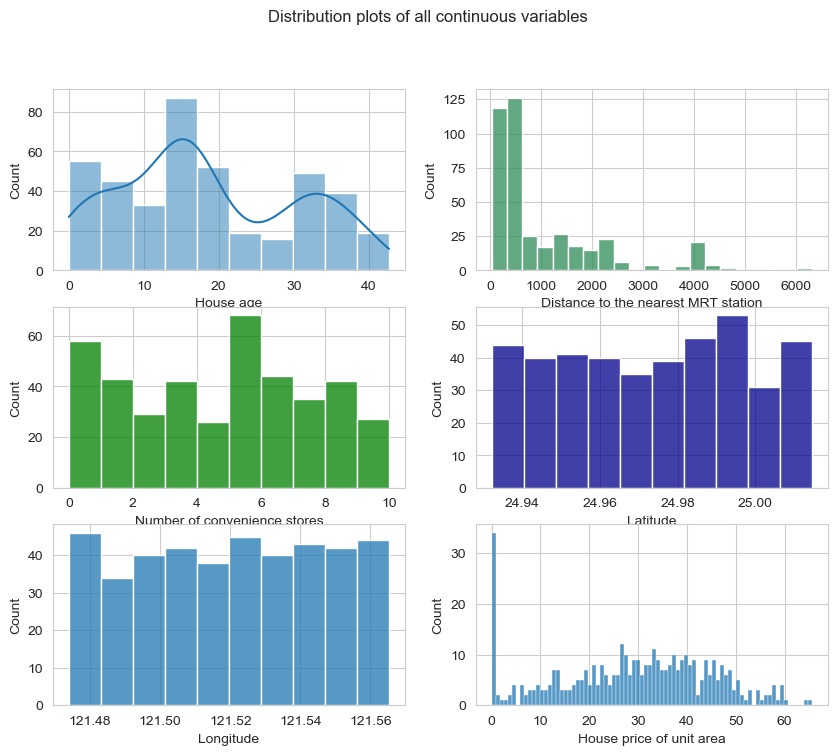

In [69]:
fig, g = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.suptitle('Distribution plots of all continuous variables')

sns.histplot(data=estate, x='House age', kde=True, ax= g[0, 0])
sns.histplot(estate, x='Distance to the nearest MRT station', color='seagreen', ax = g[0, 1])
sns.histplot(estate, x='Number of convenience stores', color='green', ax=g[1, 0])
sns.histplot(estate, x='Latitude', color='darkblue',ax=g[1, 1])
sns.histplot(estate, x='Longitude', ax=g[2, 0])
sns.histplot(estate, x='House price of unit area', bins = 80, ax=g[2, 1])

#### Explore relationships between different features (variables) with House price of unit area.

<AxesSubplot:xlabel='Latitude', ylabel='House price of unit area'>

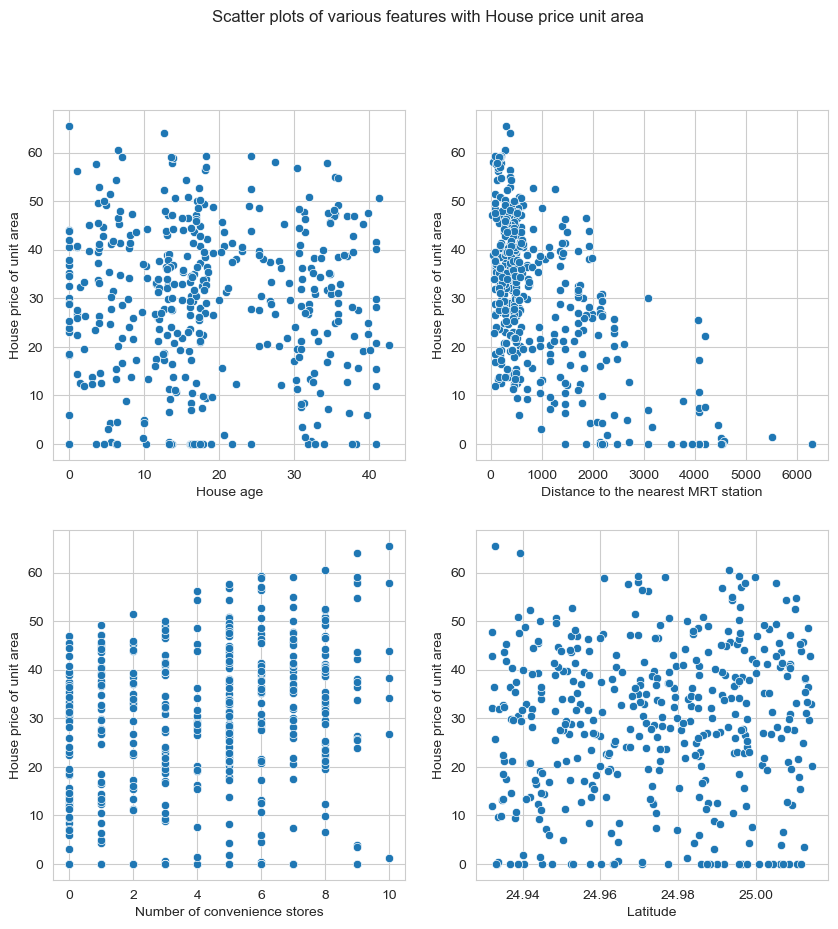

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle('Scatter plots of various features with House price unit area')

sns.scatterplot(data=estate, x='House age', y = 'House price of unit area', ax= axes[0, 0])
sns.scatterplot(data=estate, x='Distance to the nearest MRT station', y = 'House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=estate, x='Number of convenience stores', y = 'House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=estate, x='Latitude', y = 'House price of unit area', ax = axes[1, 1])

#### Insights
   - From the distributions above (left - bottom right), House age is negatively related to House price of unit area
   - Distance to the nearest MRT station is also negatively associated with House price of unit area (non-linear)
   - Over all, the distributions shows different relationships that exist among different variables and House price of unit

#### Explore correlations between different features in the dataset

In [85]:
corr_mat = estate.corr()
corr_mat

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


Text(0.5, 1.0, 'Heatmap showing Correlations among different features in the dataset')

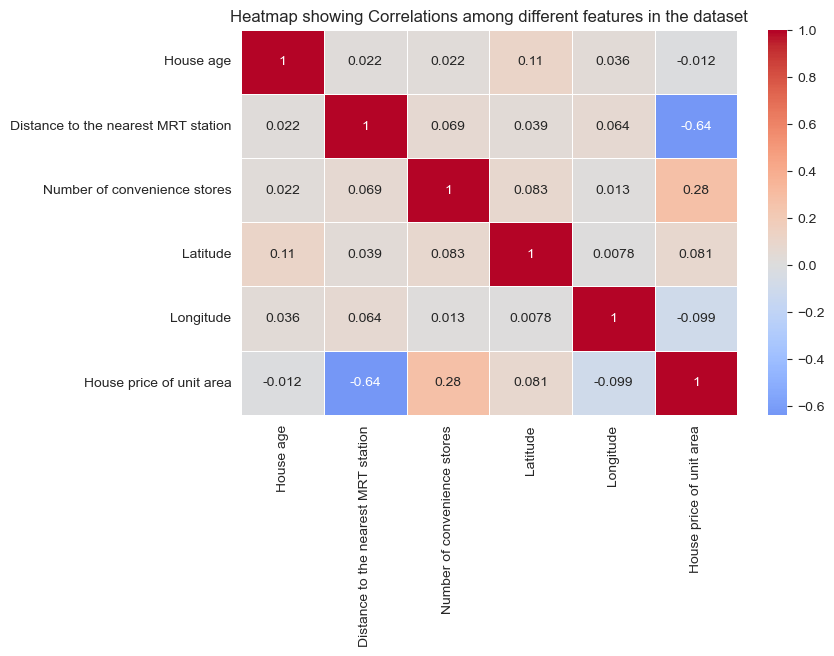

In [86]:
# visualize the results with Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data=corr_mat, cmap='coolwarm', annot=True, linewidths=.5, center= 0)
plt.title('Heatmap showing Correlations among different features in the dataset')

#### Insights:
- The correlation matrix and the heatmap clearly shows different associations and the direction of each association with 
    House price of unit area.
- House age has a weak negative correlation of -0.012. This also imply that as the house continue to get older, it 
    price of unit area decreases.
- The distance to the nearest MRT station also has a weak negative correlation (-0.65) with House price indicating that 
    the farther the house from the nearest MRT station the lower the price of unit area.
- Number of convenience stores have a weak positive correlation (0.28) with House price. This indicates that number
    of convenience stores around the house has little influence on the house price of unit area.
- Latitude have weak positive correlation (0.081) while longitude have weak negative correlation (-0.099).


#### Explore relationships between multiple variables simultaneously using pair plots or correlation matrices

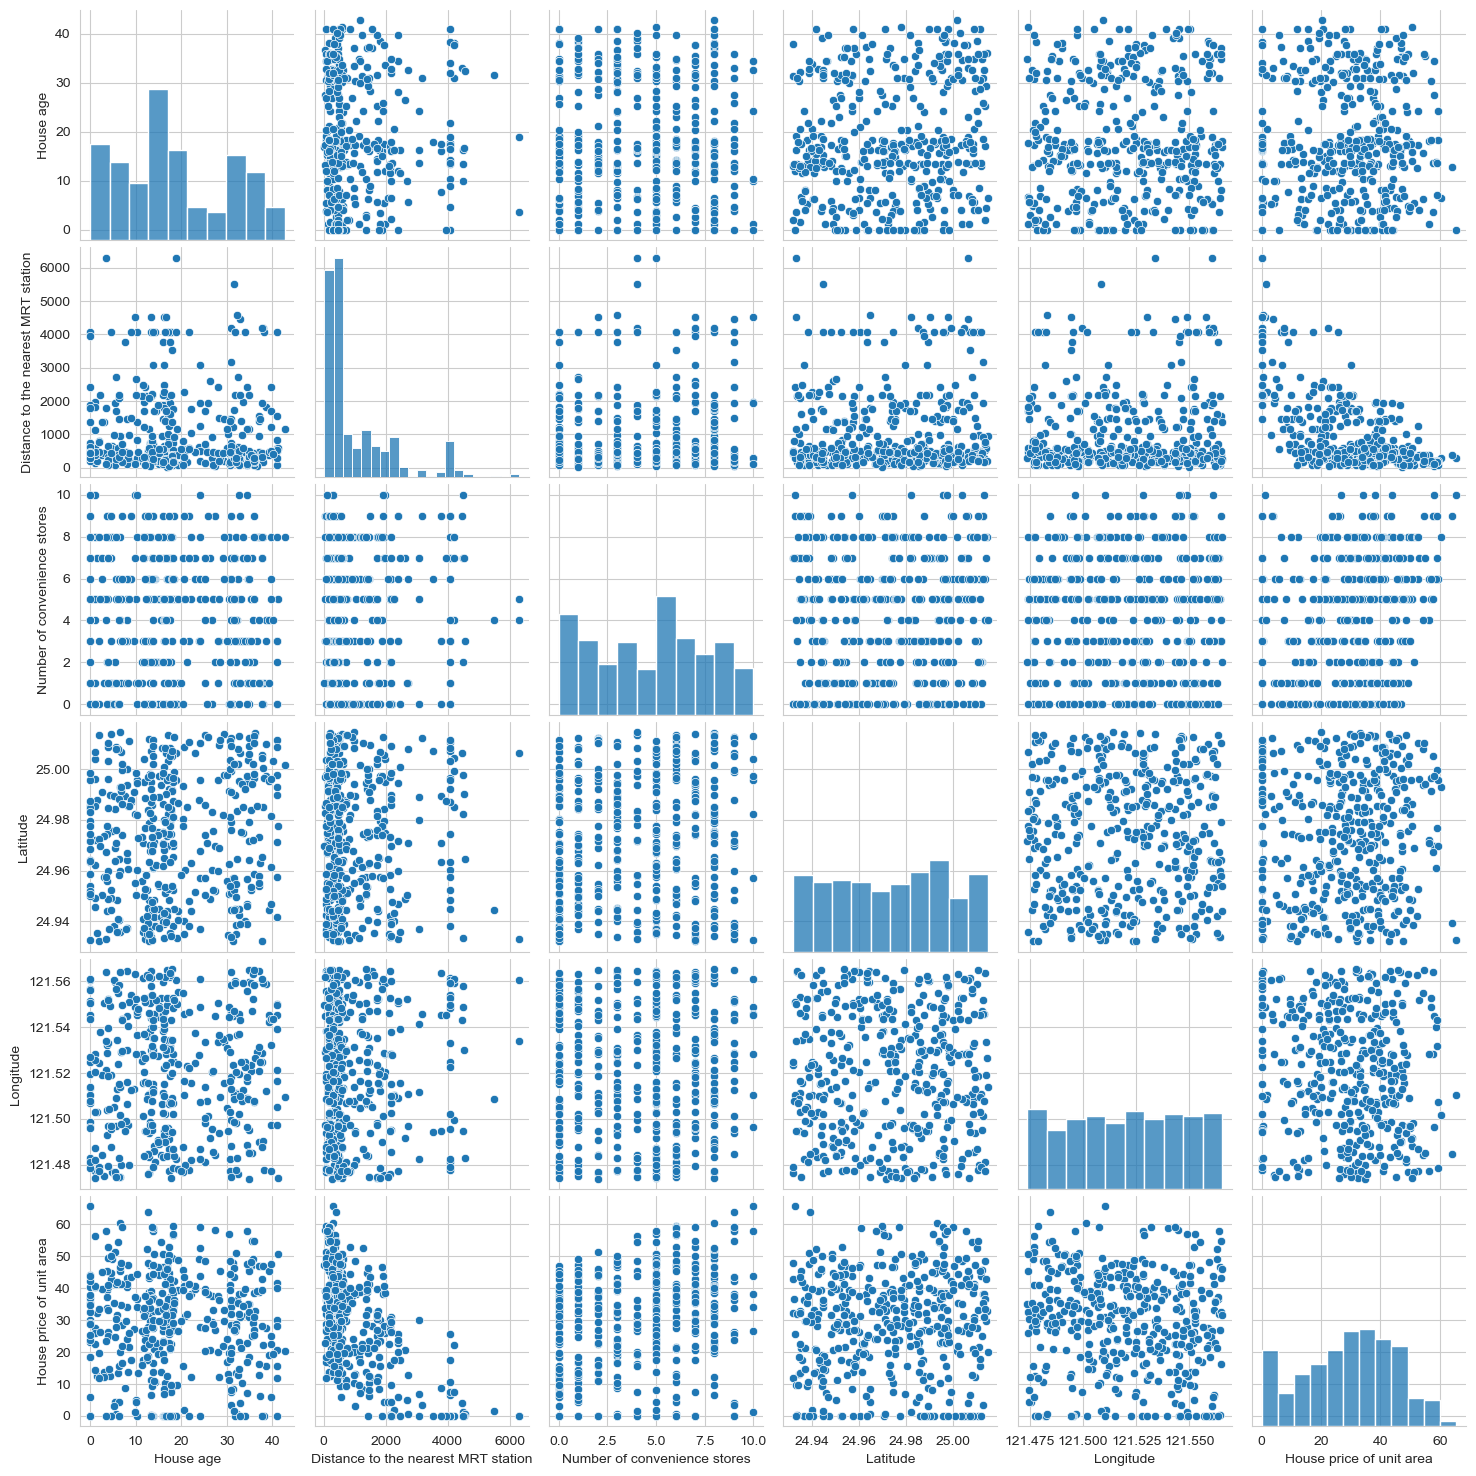

In [84]:
sns.pairplot(estate)

#### Machine Learning Model Task: Predicting the House price of unit area based on features such as distance to the nearest MRT station, number of conveneince stores, latitude and longitude, house age

In [70]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = estate[features]
y = estate[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Making prediction on the test set data
y_pred = model.predict(X_test)
y_pred

array([38.57967617, 30.27609825, 30.6148517 , 45.38701038, 23.22179398,
       32.61823307, 18.88904266, 29.93669789, 34.09959966,  5.880257  ,
       32.87903471, 39.19535229,  9.53473681, 26.61428544, 36.44367891,
       30.26629893, 28.06610431, 25.24736876, 32.25004015, 35.66460277,
       40.13079962, 43.48548399, 25.01190288, 26.25994847, 17.96317394,
       35.1153802 ,  6.81454173, 32.53540782, 43.987473  , 32.60859929,
       35.39837154, 41.43669367, 46.47139497, 47.37289674, 30.9658036 ,
       29.07482604, 10.43432846, 41.18213366, 40.61118946, 36.74681106,
       40.88032512, 36.19356287, 11.09684685, -0.15253801, 35.96982075,
       25.71288127, 45.6599185 , 38.33513258, 21.23174286, 38.95570079,
       -1.30433674, 31.2585822 , 29.54194026, 33.57109743, 39.23422904,
       32.79981935, 36.75538814, 37.20549521, 44.96061979, 31.19441284,
       16.47944682, 13.76615058, 29.077178  , 37.78745647, 20.91849415,
       24.50593074, 34.12784795, 24.56078751, 36.79999127, 26.46

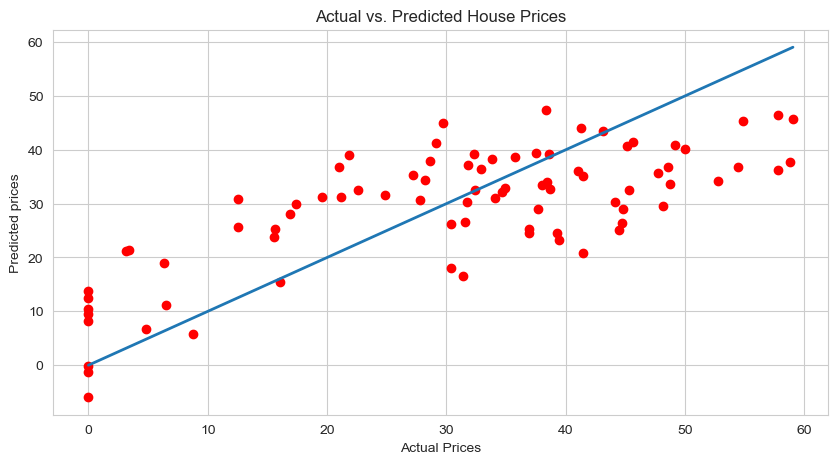

In [83]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

#### Summary
- The mean house age is 18.41 with std of 11.76.
- The mean house price of unit area is 29.10, with a std of 15.75.
- The older the house, the lower the price of unit area.
- The farther the house from the nearest MRT station, the lower the price of unit area.
- The number of convenience stores around the house has little influence on the house price of unit area.
- The ML predicted model shows a linear positive relation bewteen the features and the target variable (House price of 
    unit area).

#### Tnak you!